# Comparison between BH and SExtractor (plots)
---

## Contents
---

1. [Non padded images](#1-Non-padded-images)
1. [Padded images](#2-Padded-images)


In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
"""Import functions from annex"""
from annex_new import import_
from annex_new import get_bh_errors
from annex_new import get_sep_errors
from annex_new import count_per_bin
from annex_new import get_bh_results
from annex_new import get_sep_results

from annex_new import get_mean_acc
from annex_new import get_acc_bh
from annex_new import get_acc_sep


"""Check the folders hierarchy"""
from os.path import expanduser
user_home = expanduser("~")
path = user_home+'/Cosmostat/Codes/BlendHunter'

## 1 Non padded images
---

In [13]:
""""Retrieve results for non padded images """
bh_results = get_bh_results(path_bh_results = path+'/bh_results')
sep_results = get_sep_results(path_sep_results = path+'/sep_results')

"""Retrieve accuracies for sep and bh"""
bh_acc = [[get_acc_bh(results=bh_results[i][j], path= path) for j in range(len(bh_results[i]))] for i in range(len(bh_results))]

sep_acc = [[get_acc_sep(results=sep_results[i][j]) for j in range(len(sep_results[i]))] for i in range(len(sep_results))]

"""Compute mean accuracy for each noise level and standard deviation for error bars"""
mean_acc_bh = [np.mean(bh_acc[i]) for i in range(len(bh_acc))]
mean_acc_sep = [np.mean(sep_acc[i]) for i in range(len(sep_acc))]

std_bh = [round(np.std(bh_acc[i]), 3) for i in range(len(bh_acc))]
std_sep = [round(np.std(sep_acc[i]), 3) for i in range(len(sep_acc))]

### PLOT WITH ERROR BARS (w.r.t. $\sigma_{noise}$)

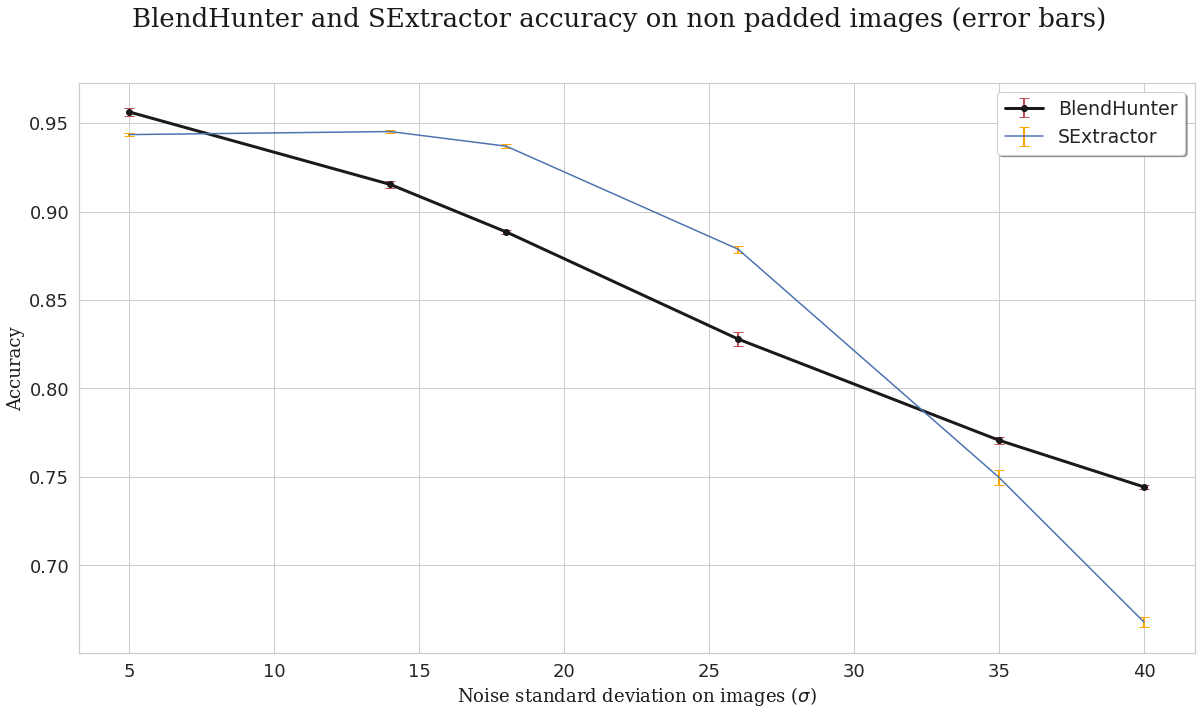

<Figure size 1440x864 with 0 Axes>

In [34]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 5})

sns.set(context='notebook', style='whitegrid', palette='deep')

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 18}

sigmas = [5.0, 14.0, 18.0, 26.0, 35.0, 40.0]
fig, ax = plt.subplots(figsize=(20,10.5), sharex=False)
#Title
fig.suptitle('BlendHunter and SExtractor accuracy on non padded images (error bars)', fontdict=font, fontsize=26)
fig = plt.figure(figsize=(20,12))

#plt.title('Comparison between BlendHunter and SExtractor on 40 000 Blended Images', fontdict=font, fontsize=22)
ax.errorbar(sigmas, mean_acc_bh, yerr=std_bh, ecolor='r', color ='k', lw=3,fmt='-o',elinewidth=2, label='BlendHunter' )
ax.errorbar(sigmas, mean_acc_sep, yerr=std_sep, ecolor='orange', lw=1.5,elinewidth=2, label='SExtractor')
ax.legend(loc='upper right', shadow=True, fontsize=19)
ax.set_ylabel('Accuracy', fontdict = font)
ax.set_xlabel('Noise standard deviation on images ($\sigma$)', fontdict = font)
ax.tick_params(axis='both', which='major', labelsize=18)
#plt.text(5, 76, '* the error bars are computed using the accuracy standard deviation on 5 runs', fontdict=font)

plt.show()

## 2 Padded images
_____

In [30]:
""""Retrieve results for non padded images """
bh_pad_results = get_bh_results(path_bh_results = path+'/bh_pad_results', pad_images=True)
sep_pad_results = get_sep_results(path_sep_results = path+'/sep_pad_results', pad_images=True)

"""Retrieve accuracies for sep and bh"""
bh_acc_pad = [[get_acc_bh(results=bh_pad_results[i][j], path= path) for j in range(len(bh_pad_results[i]))] for i in range(len(bh_pad_results))]

sep_acc_pad = [[get_acc_sep(results=sep_pad_results[i][j]) for j in range(len(sep_pad_results[i]))] for i in range(len(sep_pad_results))]

"""Compute mean accuracy for each noise level and standard deviation for error bars"""
mean_acc_bh_pad = [np.mean(bh_acc_pad[i]) for i in range(len(bh_acc_pad))]
mean_acc_sep_pad = [np.mean(sep_acc_pad[i]) for i in range(len(sep_acc_pad))]

std_bh_pad = [round(np.std(bh_acc_pad[i]), 3) for i in range(len(bh_acc_pad))]
std_sep_pad = [round(np.std(sep_acc_pad[i]), 3) for i in range(len(sep_acc_pad))]

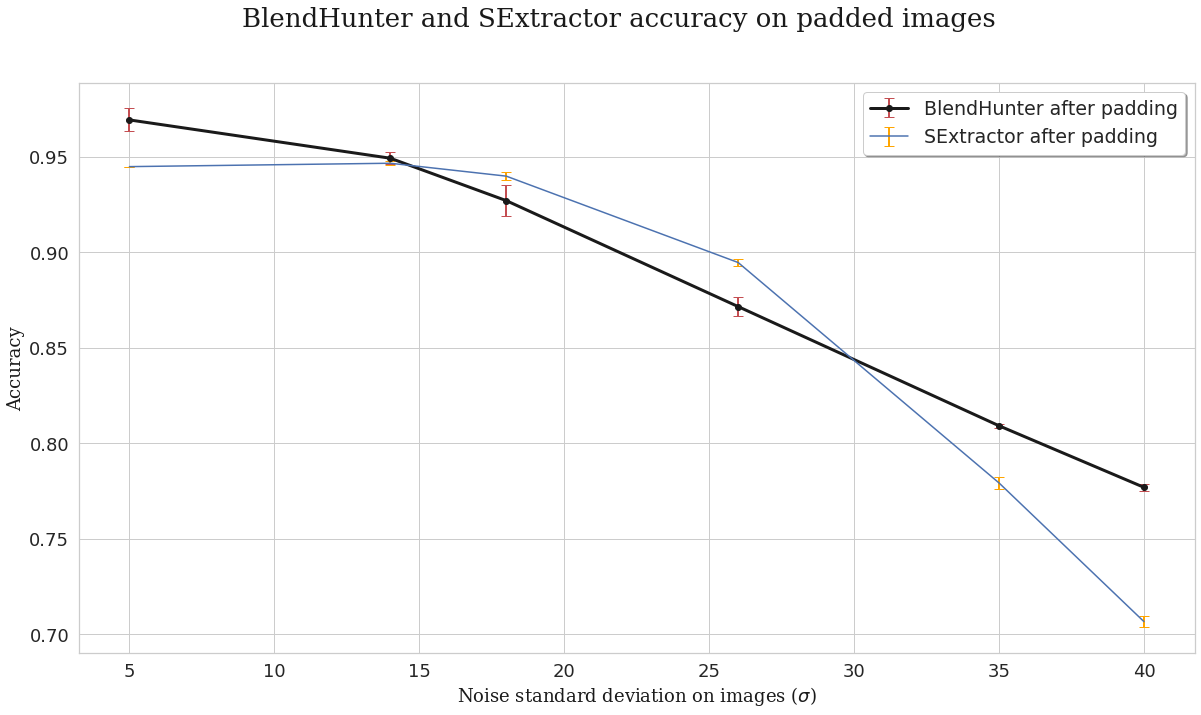

<Figure size 1440x864 with 0 Axes>

In [33]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 5})

sns.set(context='notebook', style='whitegrid', palette='deep')

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 18}

sigmas = [5.0, 14.0, 18.0, 26.0, 35.0, 40.0]
fig, ax = plt.subplots(figsize=(20,10.5), sharex=False)
#Title
fig.suptitle('BlendHunter and SExtractor accuracy on padded images', fontdict=font, fontsize=26)
fig = plt.figure(figsize=(20,12))

#plt.title('Comparison between BlendHunter and SExtractor on 40 000 Blended Images', fontdict=font, fontsize=22)
ax.errorbar(sigmas, mean_acc_bh_pad, yerr=std_bh_pad, ecolor='r', color ='k', lw=3,fmt='-o',elinewidth=2, label='BlendHunter after padding' )
ax.errorbar(sigmas, mean_acc_sep_pad, yerr=std_sep_pad, ecolor='orange', lw=1.5,elinewidth=2, label='SExtractor after padding')
ax.legend(loc='upper right', shadow=True, fontsize=19)
ax.set_ylabel('Accuracy', fontdict = font)
ax.set_xlabel('Noise standard deviation on images ($\sigma$)', fontdict = font)
ax.tick_params(axis='both', which='major', labelsize=18)
#plt.text(5, 76, '* the error bars are computed using the accuracy standard deviation on 5 runs', fontdict=font)

plt.show()